# Parcial de Inteligencia Artificial
## EDA Vilencia intrafamiliar

### primera etapa; Carga de datos y primeros vistasos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [27]:
# Cargar datos
vfamily = pd.read_csv("Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv", nrows=100000)

# Primer vistaso a los datos
vfamily.head(3)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1


In [28]:
# Conocer caracteristicas relevantes
print("Tamaño del dataset: ", vfamily.shape)

Tamaño del dataset:  (100000, 8)


In [29]:
print("indexacion del dataset: ", vfamily.index)

indexacion del dataset:  RangeIndex(start=0, stop=100000, step=1)


In [30]:
print("Informacion relevante acerca del dataset: ") 
vfamily.info()

Informacion relevante acerca del dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  100000 non-null  object
 1   MUNICIPIO     100000 non-null  object
 2   CODIGO DANE   100000 non-null  int64 
 3   ARMAS MEDIOS  100000 non-null  object
 4   FECHA HECHO   100000 non-null  object
 5   GENERO        100000 non-null  object
 6   GRUPO ETARIO  100000 non-null  object
 7   CANTIDAD      100000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.1+ MB


In [31]:
print("Media del dataset: ", vfamily.mean())

Media del dataset:  CODIGO DANE    4.504176e+07
CANTIDAD       1.564790e+00
dtype: float64


In [32]:
print("Mediana del dataset: ", vfamily.median())

Mediana del dataset:  CODIGO DANE    50006000.0
CANTIDAD              1.0
dtype: float64


In [33]:
print("Desviacion estandar del dataset: ", vfamily.std())

Desviacion estandar del dataset:  CODIGO DANE    2.753276e+07
CANTIDAD       1.672331e+00
dtype: float64


In [34]:
# Convertir datos tipo object a date
from datetime import datetime
vfamily["FECHA HECHO"] = vfamily["FECHA HECHO"].apply(lambda x: datetime.strptime(x, "%d/%m/%Y"))
vfamily["FECHA HECHO"].dtype

dtype('<M8[ns]')

In [35]:
# Verificar si existen datos faltantes
vfamily.isna().sum()

DEPARTAMENTO    0
MUNICIPIO       0
CODIGO DANE     0
ARMAS MEDIOS    0
FECHA HECHO     0
GENERO          0
GRUPO ETARIO    0
CANTIDAD        0
dtype: int64

In [36]:
# Crear nueva columna AÑO
vfamily["AÑO"] = vfamily["FECHA HECHO"].apply(lambda x: x.year)

In [37]:
# Analisis de datos exploratorio

In [38]:
# Cuantas personas han sido victimas de delitos relacionados a violencia intrafamiliar?
vfamily.CANTIDAD.sum()

156479

In [39]:
# Anualmente cuantas personas padecen ese flagelo?
pf_violencia = vfamily.groupby(['AÑO']).agg({"CANTIDAD":['sum']})

,CANTIDAD
,sum
AÑO,
2010,23171
2011,27194
2012,32417
2013,33076
2014,40621


<AxesSubplot:xlabel='AÑO', ylabel='count'>

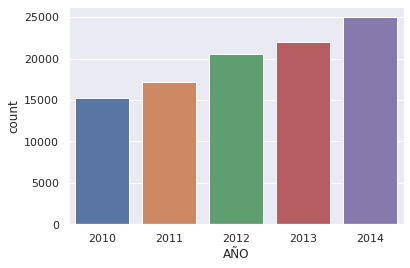

In [40]:
sns.countplot(x="AÑO", data=vfamily)

In [199]:
# Por año, que mes presento mayor numero de incidentes?
vfamily["MES"] = vfamily["FECHA HECHO"].apply(lambda x: x.month)

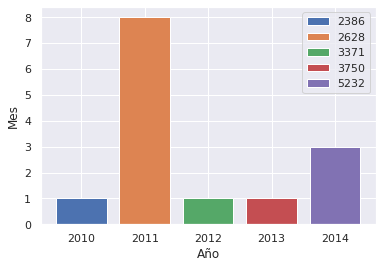

In [233]:
l = []
Años = list(set(vfamily.AÑO))

for A in range (len(Años)):
    m_greater = vfamily[vfamily['AÑO'] == Años[A]].groupby(['MES'])['CANTIDAD'].sum().idxmax()
    c_greater = vfamily[(vfamily['AÑO'] == Años[A]) & (vfamily['MES'] == m_greater)]['CANTIDAD'].sum()
    plt.bar(Años[A], m_greater, label=c_greater)
    #l.append({Años[A]:m_greater})
    #print(c_greater)

plt.ylabel("Mes")
plt.xlabel("Año")
plt.legend();


<AxesSubplot:xlabel='MES', ylabel='count'>

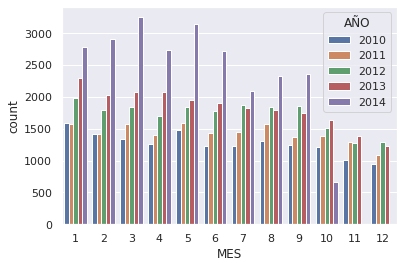

In [43]:
# Comparativa mes a mes, discriminando los datos por el año
sns.countplot(x="MES", data=vfamily, hue="AÑO")

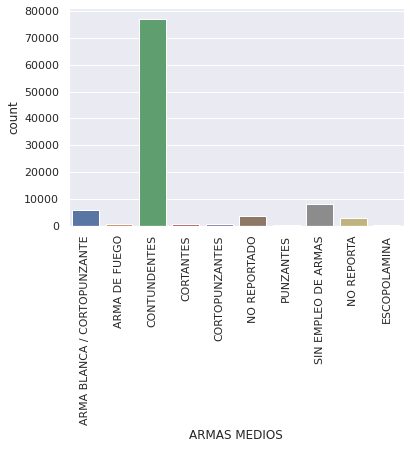

In [236]:
# Cual es el tipo de arma mas usada en delitos intrafamiliares?
sns.countplot(x='ARMAS MEDIOS', data=vfamily)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='GRUPO ETARIO', ylabel='count'>

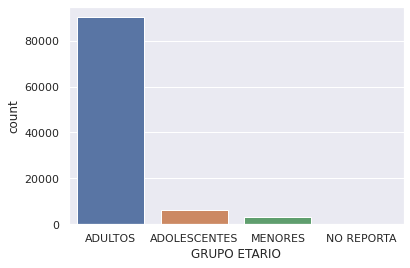

In [243]:
# Cual es el grupo etario mas afectado?
sns.countplot(x='GRUPO ETARIO', data=vfamily)

In [238]:
#

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO DANE', 'ARMAS MEDIOS',
       'FECHA HECHO', 'GENERO', 'GRUPO ETARIO', 'CANTIDAD', 'AÑO', 'MES'],
      dtype='object')

<AxesSubplot:xlabel='GRUPO ETARIO', ylabel='count'>

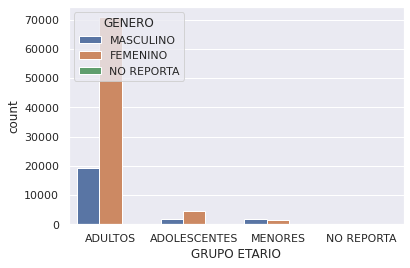

In [244]:
# Cual es el grupo etario mas afectado, discriminado por genero?
sns.countplot(x='GRUPO ETARIO', data=vfamily, hue='GENERO')

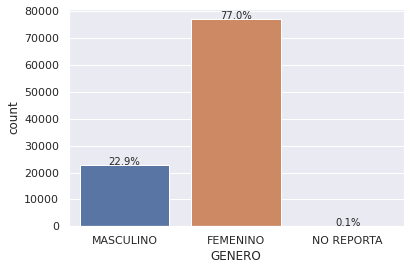

In [249]:
# Que genro se ve mas afectado con los hechos de violencia y que porcentaje representan?
ax = sns.countplot(x='GENERO', data=vfamily)

total = float(len(vfamily))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:2.1f}%'.format(100*(height/total)),
            ha="center") 

In [250]:
# Segun datos historicos cuales fueron los dias del mes con mayores actos de violencia?
vfamily['DIA'] = vfamily["FECHA HECHO"].apply(lambda x: x.day)

<AxesSubplot:xlabel='DIA', ylabel='count'>

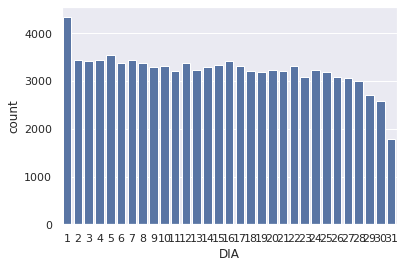

In [254]:
b_color = sns.color_palette()[0]
sns.countplot(x='DIA', data=vfamily, color=b_color)